In [11]:
import auth
import requests
import base64
import json
import pandas as pd
flickr = auth.connect()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Query Flickr API for photos tagged with "San Francisco"
photos = flickr.photos.search(text='San Francisco', extras='geo', per_page=1000)['photos']['photo']

# Extract latitude and longitude information from photo metadata
latitudes = [float(photo['latitude']) for photo in photos if photo.get('latitude') != None]
longitudes = [float(photo['longitude']) for photo in photos if photo.get('longitude') != None]

# Cluster photos using k-means algorithm
X = np.array(list(zip(latitudes, longitudes)))

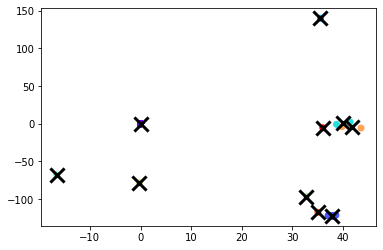

In [13]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_

# Plot clusters and PoIs on a map
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='black')
plt.show()